# Análise de dados - Empresa A


### Bibliotecas

In [ ]:
import pyodbc
import pandas as pd

### Conexão com banco de dados SQLite

In [ ]:
# Usamos abaixo so para pegar o nome do driver (descomente para usar)
#print(pyodbc.drivers())

dados_conexao = ("Driver={SQLite3 ODBC Driver};Server=localhost;Database=salarios.sqlite")
conexao = pyodbc.connect(dados_conexao)
cursor = conexao.cursor()

### Importação da Base de Dados

In [ ]:
# executa comando SQL
cursor.execute('SELECT * FROM Salaries')

# Fetchall armazena todos valores em cursor
valores = cursor.fetchall()

# pega lista de tuplas contendo nomes das colunas, depois armazena os nomes
# na variável COLUNAS
nomes_colunas = cursor.description
colunas = [tupla[0] for tupla in nomes_colunas]

# coloca os valores numa tabela python
tabela = pd.DataFrame.from_records(valores, columns=colunas)


In [169]:
# print tabela
display(tabela.head())

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,,San Francisco,


### Limpeza de Dados

In [132]:
# garantindo que estamos só com a loja San Francisco
tabela_sf = tabela.loc[tabela['Agency']== "San Francisco", :]
display(tabela_sf.head())

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,,San Francisco,


In [133]:
# verificar se tipos de dados estao corretos
# e se tem valores nulos
print(tabela_sf.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             148654 non-null  object 
 11  Agency            148654 non-null  object 
 12  Status            148654 non-null  object 
dtypes: float64(6), int64(2), object(5)
memory usage: 15.9+ MB
None


In [135]:
# Remover linhas onde total pay <= 0        
indexs = tabela_sf.loc[tabela_sf['TotalPay']<=0].index   
for index in indexs:
    tabela_sf.drop(index=index, inplace=True)
display(tabela_sf[0:3])

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,,San Francisco,


### Análise de Dados

# 1. Qual foi a evolução do salário médio ao longo dos anos

In [148]:
# função 2 casas decimais
def format(valor):
    valor = f'{valor:,.2f}'
    #valor = float(valor)
    return valor

In [131]:
# Agrupar o ano em uma linha só fazendo a média de todas as colunas
tabela_sal = tabela_sf.groupby("Year").mean()
# Aplica a funcao format
tabela_sal['TotalPay'] = tabela_sal['TotalPay'].apply(format)
# mostrar colunas específicas
display(tabela_sal[['TotalPay']])

,TotalPay
Year,
2011,71750.06
2012,74163.69
2013,78210.41
2014,75568.99


### Gráfico de evolução de salário médio por ano

<AxesSubplot:xlabel='Year'>

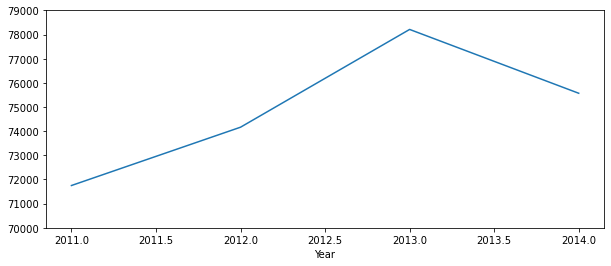

In [124]:
# Plotar o resultado
total_pago = tabela_sal["TotalPay"]
# plota, tamanho e passo do eixo Y
total_pago.plot(figsize=(10, 4), yticks=range(70000, 80000, 1000))

# 2. Quantos funcionários tivemos ao longo dos anos

In [137]:
# agrupa por ano e soma os funcionários
qnt_func = tabela_sf.groupby('Year').count()
display(qnt_func[['EmployeeName']])

,EmployeeName
Year,
2011,36156
2012,36741
2013,37318
2014,38070


### Gráfico de evolução da quantidade de funcionários por ano

<AxesSubplot:xlabel='Year'>

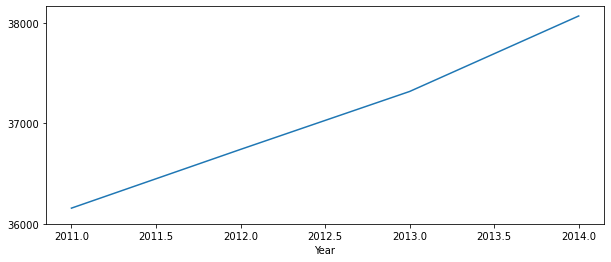

In [105]:
# pega coluna para plotar
total_f = qnt_func['EmployeeName']
# plota, tamanho e passo do eixo Y
total_f.plot(figsize=(10, 4), yticks=range(36000, 39000, 1000))

# 3. Qual foi a evolução do total gasto com salário ao longo dos anos

In [163]:
# Agrupar o ano em uma linha só fazendo a média de todas as colunas
tabela_sal_total = tabela_sf.groupby("Year").sum()



tabela_sal_total['Total geral'] = tabela_sal_total['TotalPay'] + tabela_sal_total['TotalPayBenefits']

tabela_sal_total = tabela_sal_total[['TotalPay', 'TotalPayBenefits', 'Total geral']]


# Aplica a funcao format
tabela_sal_total['TotalPay'] = tabela_sal_total['TotalPay'].apply(format)
# Aplica a funcao format
tabela_sal_total['TotalPayBenefits'] = tabela_sal_total['TotalPayBenefits'].apply(format)
# Aplica a funcao format
tabela_sal_total['Total geral'] = tabela_sal_total['Total geral'].apply(format)
# mostrar colunas específicas
display(tabela_sal_total[['TotalPay', 'TotalPayBenefits', 'Total geral']])

,TotalPay,TotalPayBenefits,Total geral
Year,,,
2011,"2,594,195,051.88","2,594,195,051.88","5,188,390,103.76"
2012,"2,724,848,200.44","3,696,875,946.73","6,421,724,147.17"
2013,"2,918,655,930.80","3,812,500,379.92","6,731,156,310.72"
2014,"2,876,911,569.39","3,821,749,102.63","6,698,660,672.02"


### Gráfico de pagamentos de salários por ano (TotalPay)

In [165]:
# Função retira as virgulas e transforma os valores em float pra poder plotar
def formatf(valor):
    valor = valor.replace(',', '')
    return float(valor)

<AxesSubplot:xlabel='Year'>

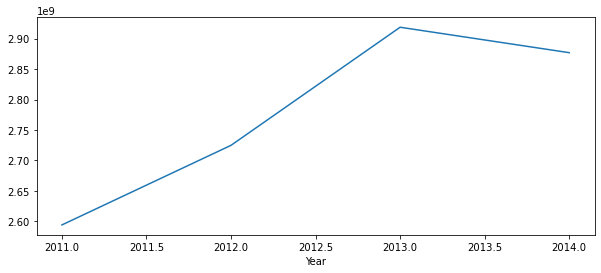

In [157]:
# pega coluna para plotar
tabela_sal_total['TotalPay'] = tabela_sal_total['TotalPay'].apply(formatf)

total_sal = tabela_sal_total['TotalPay']
# plota, tamanho e passo do eixo Y
total_sal.plot(figsize=(10, 4))

### Gráfico de pagamentos de benefícios por ano (TotalPayBenefits)

<AxesSubplot:xlabel='Year'>

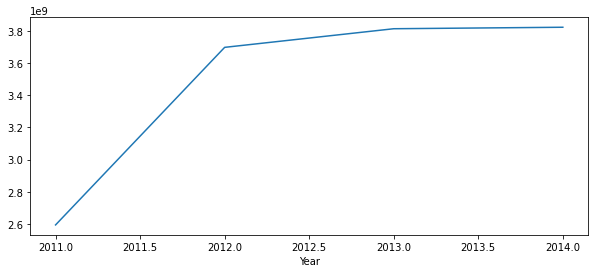

In [164]:
# pega coluna para plotar
tabela_sal_total['TotalPayBenefits'] = tabela_sal_total['TotalPayBenefits'].apply(formatf)

total_ben = tabela_sal_total['TotalPayBenefits']
# plota, tamanho e passo do eixo Y
total_ben.plot(figsize=(10, 4))

### Gráfico de pagamentos totais por ano (TotalPay + TotalPayBenefits)

<AxesSubplot:xlabel='Year'>

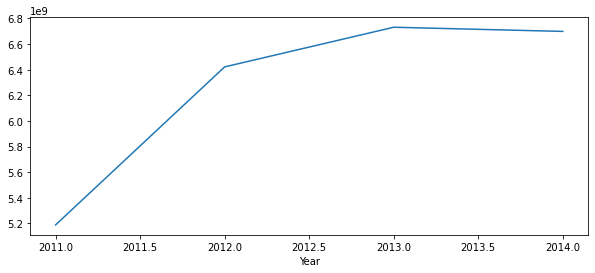

In [166]:
# pega coluna para plotar
tabela_sal_total['Total geral'] = tabela_sal_total['Total geral'].apply(formatf)

total_geral = tabela_sal_total['Total geral']
# plota, tamanho e passo do eixo Y
total_geral.plot(figsize=(10, 4))